# Authors:
    - Akash Tadwai- ES18BTECH11019
    - Vinta Reethu- ES18BTECH11028

# Importing Libraries

In [125]:
import math                       # Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime
import warnings
import calendar
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import zipfile
%matplotlib inline
import seaborn as sns
import scipy.special as sps  
sns.set(color_codes=True)
from IPython.display import display, Math, Latex, HTML
from sklearn.model_selection import train_test_split
display(HTML("<style>.container { width:100% !important; }</style>"))
print("Setup Complete")

Setup Complete


# Loading Dataset

In [126]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -o Bike-Sharing-Dataset.zip

--2020-11-01 12:24:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.4’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.04MB/s    in 0.3s    

2020-11-01 12:24:34 (1.04 MB/s) - ‘Bike-Sharing-Dataset.zip.4’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [127]:
df= pd.read_csv("/content/hour.csv")              # Loading the input csv file
drop_features = ['instant','mnth']                      
df = df.drop(drop_features,axis=1)                # Dropping instant, mnth features

df.rename(columns={'dteday': 'datetime', 'weathersit': 'weather','hum':'humidity','hr':'hour','cnt':'count','yr':'year'}, inplace=True)
df["day"] = df.datetime.apply(lambda datestr : datetime.strptime(datestr,"%Y-%m-%d").day)
df["weekday"] = df.datetime.apply(lambda datestr : calendar.day_name[datetime.strptime(datestr,"%Y-%m-%d").weekday()])
df["month"] = df.datetime.apply(lambda datestr : calendar.month_name[datetime.strptime(datestr,"%Y-%m-%d").month])
categories = ["hour","weekday","month","season","year","weather","holiday","workingday"]
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
for var in categories:                            # Converting some columns into category type
    df[var] = df[var].astype("category")
train = df[df['day']<19]                          # Splitting the data based on day
test = df[df['day'] > 19]                         # If date < 19 then we add that to train set, else test set

print(df.dtypes)

datetime        object
season        category
year          category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
day              int64
month         category
dtype: object


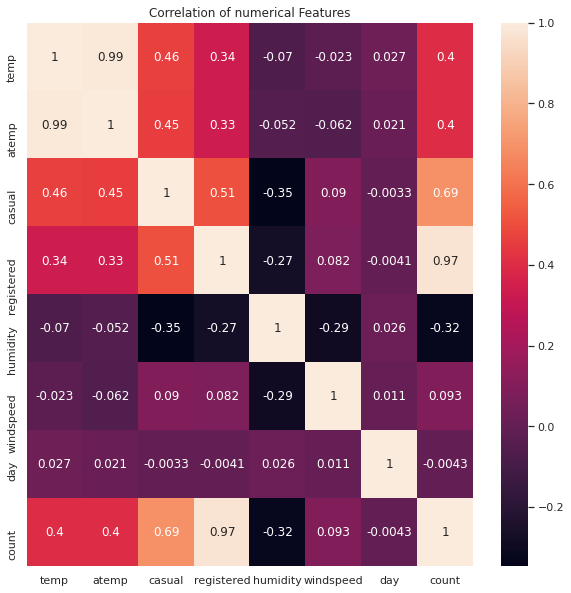

In [128]:
features = df[["temp","atemp","casual","registered","humidity","windspeed","weather","day","count"]].corr()
plt.figure(figsize=(10,10))
plt.title("Correlation of numerical Features")
plt.xlabel("Numerical Features")
sns.heatmap(features,annot=True)

# Categorical Variables 


As the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. We create new columns and drop date time column
- Creating new columns "date","hour","weekDay","month" from "datetime" column.
- changing the data type of "season","holiday","workingday" and weather to category.
- Dropping the datetime column as we already extracted useful features from it.

# Plots

The mean count per month is 191.14315
The median count per month is 205.29504
The mean count per each day of week is 190.69694


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

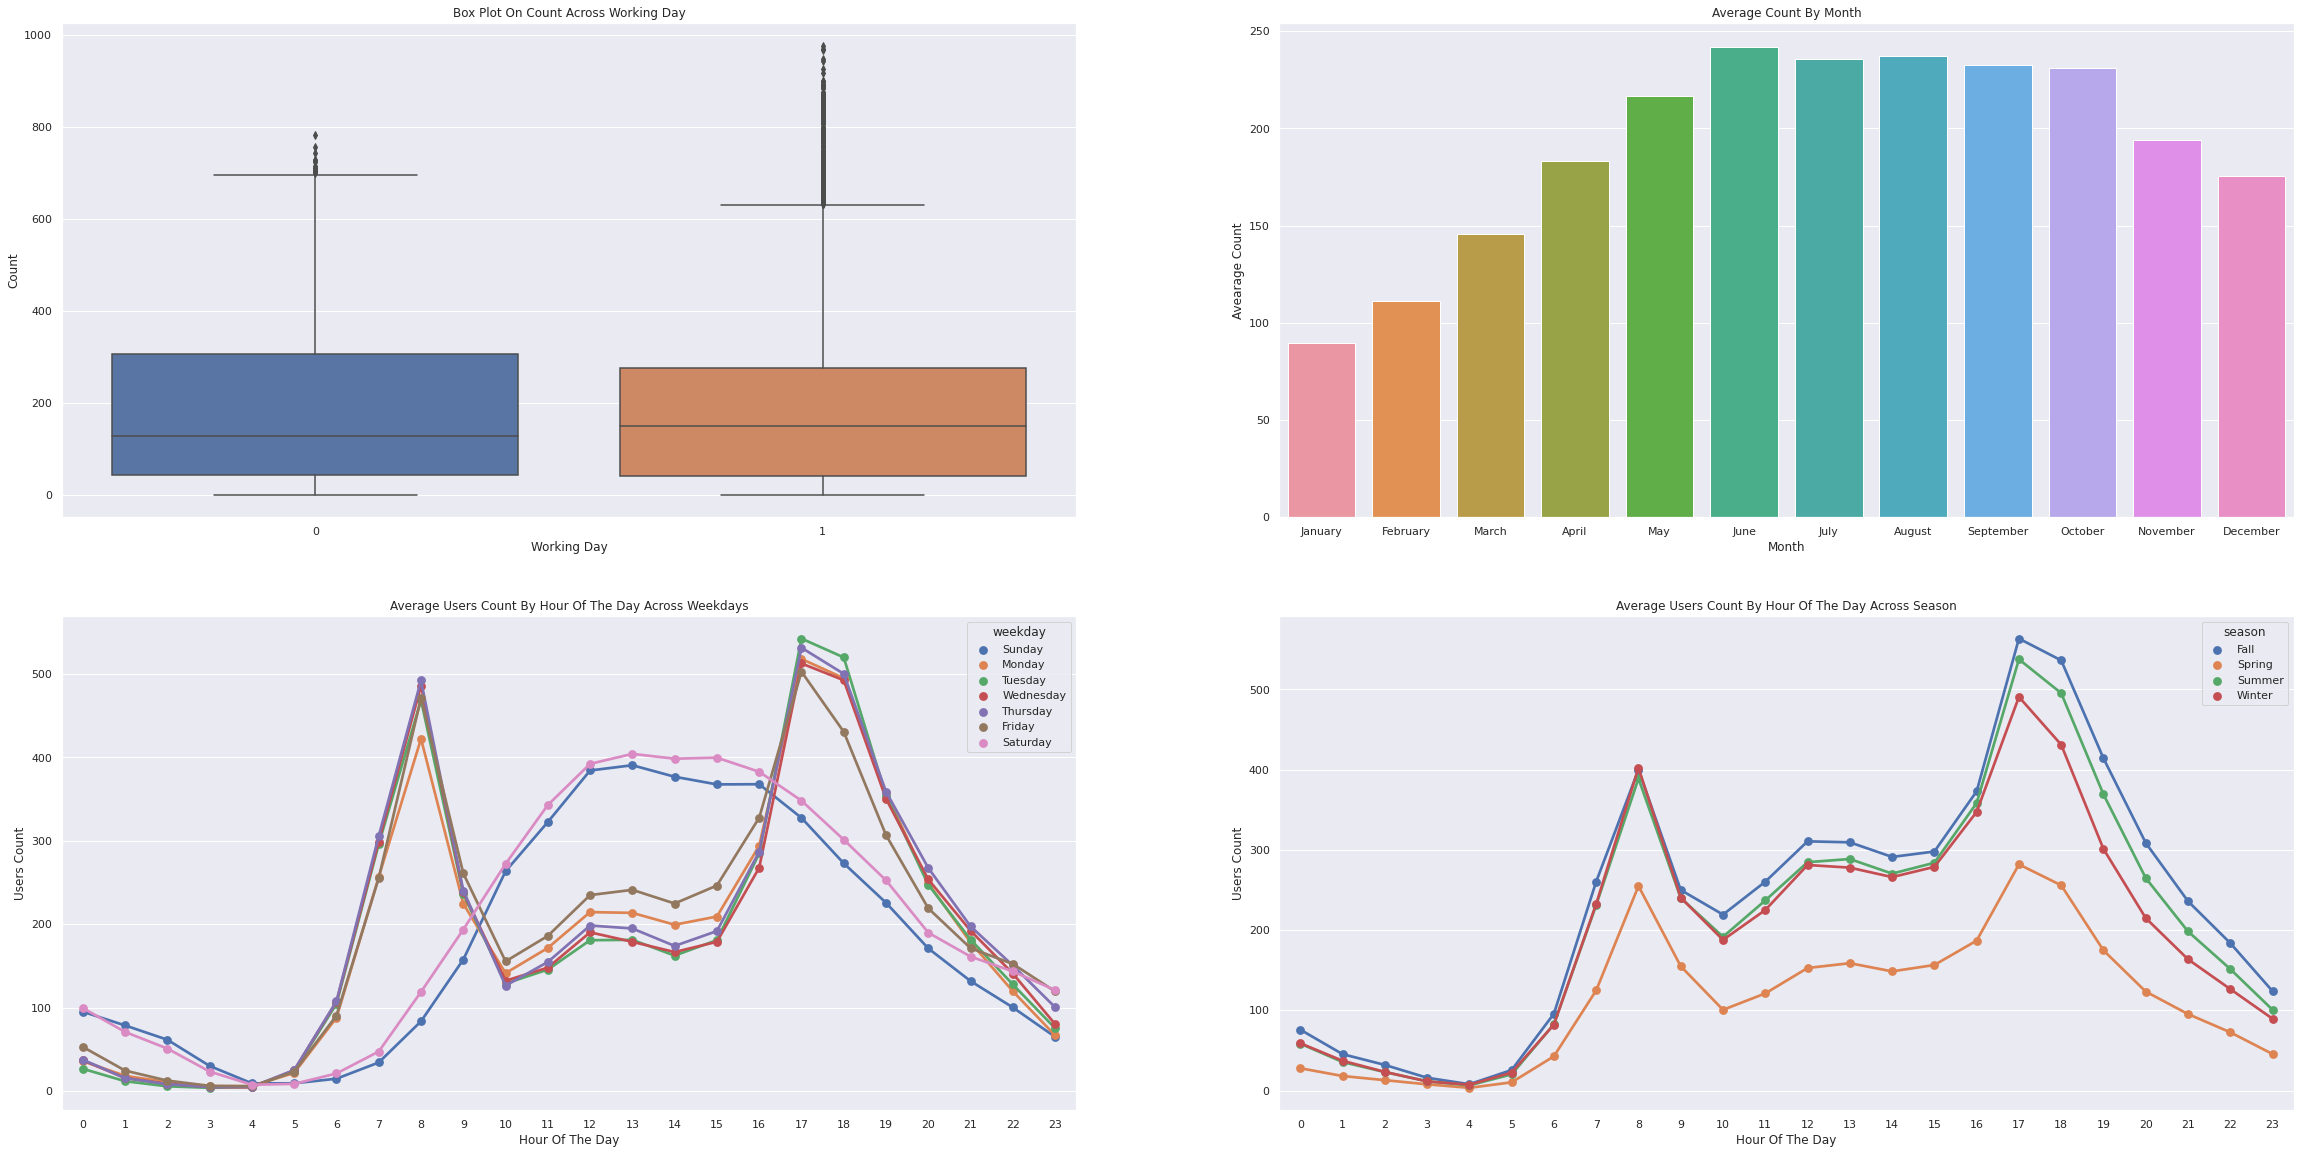

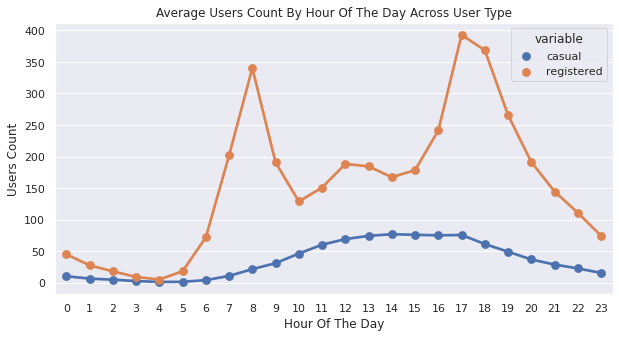

In [129]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)       # Plotting the plots using tarining set
fig.set_size_inches(40,20)
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
weekdays = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]


# Plotting the box plot of Box Plot On Count Across Working Day
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=ax1)
ax1.set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")


# Plotting Average Count By Month
month_group = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
month_ordered = month_group.sort_values(by="count",ascending=False)
sns.barplot(data=month_ordered,x="month",y="count",ax=ax2,order=months)  # plot monthwise
ax2.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

print("The mean count per month is {:.5f}".format(month_ordered['count'].mean()))           # Finding the mean parameter of count variable
print("The median count per month is {:.5f}".format(month_ordered['count'].median()))       # Finding the median parameter of count variable


# Plotting Average Users Count By Hour Of The Day Across Weekdays
hour_group = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_group["hour"], y=hour_group["count"],hue=hour_group["weekday"],hue_order=weekdays, data=hour_group, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')
print("The mean count per each day of week is {:.5f}".format(hour_group['count'].mean()))   # Finding the mean count per week


# Plotting Average Users Count By Hour Of The Day Across Season
hour_group = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_group["hour"], y=hour_group["count"],hue=hour_group["season"], data=hour_group, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


fig,ax5=plt.subplots()
fig.set_size_inches(10,5)
# Plotting Average Users Count By Hour Of The Day Across User Type
hourTransformed = pd.melt(train[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hour_group = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hour_group["hour"], y=hour_group["value"],hue=hour_group["variable"],hue_order=["casual","registered"], data=hour_group, join=True,ax=ax5)
ax5.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

# MLE - Poisson Regression (Derivation)



## Mean 


If $\mathbf{x} \in \mathbb{R}^{n}$ is a vector of independent variables, We know that Poisson regression model takes the form,
$$
\log (\mathrm{E}(Y \mid \mathbf{x}))=\alpha+\beta^{\prime} \mathbf{x}
$$

Given a Poisson regression model $\theta$ and an input vector $x,$ the predicted mean of the associated Poisson distribution is given by
$$
\mathrm{E}(Y \mid \mathbf{x})=e^{\theta^{\prime} \mathbf{x}}
$$  


## Likelihood

Given a set of parameters $\theta$ and an input vector $x$, the mean of the Poisson distribution, is given by
$$
\lambda=\mathrm{E}(Y \mid x)=e^{\theta^{T} x}
$$<br>
and thus, the Poisson probability mass function is given by
$$
p(y \mid x ; \theta)=\frac{\lambda^{y}}{y !} e^{-\lambda}=\frac{e^{y \theta^{T} x} e^{-e^{\theta^{T} x}}}{y !} 
$$ <br>
Now suppose we are given a data set consisting of $m$ vectors $x_{i} \in \mathbb{R}^{n+1}, i=1, \ldots, m$, along with a set of $m$ values $y_{1}, \ldots, y_{m} \in \mathbb{N}$. Then, for a given set of parameters $\theta$, the probability of attaining this particular set of data is given by
$$
p\left(y_{1}, \ldots, y_{m} \mid x_{1}, \ldots, x_{m} ; \theta\right)=\prod_{i=1}^{m} \frac{e^{y_{i} \theta^{T} x_{i}} e^{-e^{\theta^{T} x_{i}}}}{y_{i} !}
$$
By the method of maximum likelihood, we want to find the set of parameters $\theta$ that makes this probability as large as possible. 
$$
L(\theta \mid X, Y)=\prod_{i=1}^{m} \frac{e^{y_{i} \theta^{T} x_{i}} e^{-e^{\theta^{T} x_{i}}}}{y_{i} !}
$$
Now we take the log on both sides of Likelihood function:
$$
\ell(\theta \mid X, Y)=\log L(\theta \mid X, Y)=\sum_{i=1}^{m}\left(y_{i} \theta^{T} x_{i}-e^{\theta^{T} x_{i}}-\log \left(y_{i} !\right)\right)
$$
Notice that the parameters $\theta$ only appear in the first two terms of each term in the summation. Therefore, given that we are only interested in finding the best value for $\theta$ we may drop the $y_{i}^{T}$ and simply write
$$
\ell(\theta \mid X, Y)=\sum_{i=1}^{m}\left(y_{i} \theta^{T} x_{i}-e^{\theta^{T} x_{i}}\right)
$$

<p>As we don't get closed form solution we minimise the negative log-likelihood and update the weights.</p>

## Cost function

We take the cost function as the negative log likelihood,
$$J\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots\right)=-\frac{1}{2m}\sum_{i=1}^{m}\left(y_{i} \theta^{T} x_{i}-e^{\theta^{T} x_{i}}\right)$$
<br>
<br>
By taking the derivative of loss function, $-\ell(\theta \mid X, Y)$ w.r.t &nbsp;$\theta$,&nbsp; we get,
<br><br>
$$ \nabla \mathrm{E}(\mathbf{w})=\frac{\partial J(\theta \mid X, Y)}{\partial \theta}=-\frac{1}{2m}\sum_{i=1}^{m}\left(y_{i} x_{i}-e^{\theta^{T} x_{i}} x_{i}\right)$$    
Hence the Gradient Descent Update is as follows,
$$w^{n e w}=w -\frac{\eta}{2m} \sum_{i=1}^{m}\left( e^{\theta^{T} x_{i}}  - y_{i} \right) x_{i}  $$  

$\eta:$ Learning Rate

In [130]:
data = pd.read_csv("/content/hour.csv")           # Loading the input csv file

# Model Training and Prediction


In [131]:
data.drop(['instant'],axis=1,inplace=True)
data.rename(columns={'dteday': 'datetime', 'weathersit': 'weather','hum':'humidity','hr':'hour','cnt':'count','yr':'year','mnth':'month'}, inplace=True)
data["weekday"] = data.datetime.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday()) #  Obtaining weekday from datetime
data["day"] = data.datetime.apply(lambda datestr : datetime.strptime(datestr,"%Y-%m-%d").day)                 #  Obtaining day from datetime

In [132]:
categories = ["hour","weekday","month","season","weather","holiday","workingday","year"]
for var in categories:                           # Converting variables into categories
    data[var]=data[var].astype("category")

In [133]:
def onehotencoding(feature,data):               # Function that does onehotencoding for the given column
    features=pd.get_dummies(data[feature], prefix=feature)
    return features

In [134]:
hour_df=onehotencoding("hour",data)             # Calling the onehotencoding on the categorical variables
weekday_df=onehotencoding("weekday",data)
season_df=onehotencoding("season",data)
year_df=onehotencoding("year",data)
weather_df=onehotencoding("weather",data)
holiday_df=onehotencoding("holiday",data)
workingday_df=onehotencoding("workingday",data)

In [135]:
features = ["casual","year","datetime","registered","hour","weekday","month","season","weather","holiday","workingday","atemp"]

data.drop(features,axis=1,inplace=True)        # Drooping the dummy features(The ones from which got hotcode columns)

#Concatenating the obtained onehot encoded columns to the data frame 
data = pd.concat([data, hour_df], axis=1)      
data = pd.concat([data, weekday_df], axis=1)
data = pd.concat([data, season_df], axis=1)
data = pd.concat([data, weather_df], axis=1)
data = pd.concat([data, holiday_df], axis=1)
data = pd.concat([data, workingday_df], axis=1)

In [136]:
train = data[data['day']<19]                # Splitting the data based on day 
test = data[data['day'] > 19]               # If date < 19 then we add that to train set, else test set

train = train.drop(['day'],axis=1)          # Dropping the day column as it is no longer required
test = test.drop(['day'],axis=1)
print(train.dtypes)
print(train.shape)

temp            float64
humidity        float64
windspeed       float64
count             int64
hour_0            uint8
hour_1            uint8
hour_2            uint8
hour_3            uint8
hour_4            uint8
hour_5            uint8
hour_6            uint8
hour_7            uint8
hour_8            uint8
hour_9            uint8
hour_10           uint8
hour_11           uint8
hour_12           uint8
hour_13           uint8
hour_14           uint8
hour_15           uint8
hour_16           uint8
hour_17           uint8
hour_18           uint8
hour_19           uint8
hour_20           uint8
hour_21           uint8
hour_22           uint8
hour_23           uint8
weekday_0         uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
weather_1         uint8
weather_2         uint8
weather_3       

In [137]:
y_train = train["count"]                    # Storing the count column of train dataframe in Y_train 
y_test = test['count']                      # Storing the count column of test dataframe in Y_test
y_train=y_train.to_numpy()                  # Converting list to numpy array
Y_test= y_test.to_numpy()                   # Converting list to numpy array

In [138]:
train=train.drop(['count'],axis=1)          # Dropping the day column as it is no longer required
X_test=test.drop(['count'],axis=1)          # Dropping the day column as it is no longer required
print(train.shape,X_test.shape)

(10312, 46) (6493, 46)


In [139]:
train = np.c_[ np.ones(train.shape[0]),train]             # Appending 1s in the front of train
X_test = np.c_[ np.ones(X_test.shape[0]),X_test]          # Appending 1s in the front of test
X_train, X_valid, Y_train, Y_valid = train_test_split(train, y_train, test_size=0.2,random_state=42) # Test- Train-Split
print(X_train.shape,X_test.shape)

(8249, 47) (6493, 47)


In [140]:
def cost_function(X, Y,_lambda, W, flag):            # Cost function
    h = np.exp(X @ W)
    m=X.shape[0]                                          # Finding the shape of X_train
    loss = 1/2 * np.mean(np.exp(X@W)-np.multiply(Y,X@W))  # Loss is caluculated
    if flag==0:   # No regularisation
        J = loss
    elif flag==1: #Lasso - L1 norm
        J = loss + (_lambda/(2*m))*np.sum(abs(W[1:]))
    elif flag==2: #Ridge - L2 norm
        J = loss + (_lambda/(2*m))*(np.sum(np.square(W[1:]))) 
    return J                                                    # Returning Loss
                                            

In [141]:
def gradientDescent(X,Y,W,_lambda,alpha,loss,flag):

    h = np.exp(X @ W)
    m=X.shape[0]
    grad = (h - Y)@X
    W = W - (1/(2*m)) * (alpha*grad) 
    if flag==1: # Lasso - L1 norm
        W[1:]+=(_lambda/(2*m))*(np.sign(W[1:]))     # Derivative of |x| is signum(x) -> np.sign(x)
    elif flag==2: #Ridge - L2 norm
        W[1:] += (_lambda/m)*W[1:] 
    return W                                            # Returning Weights


In [142]:
def batch_gradient_descent(X, Y, W, alpha, epochs,_lambda,flag):    # Batch Gradient Descent function
  train_loss = [0] * epochs     # List to store loss values
  valid_loss = [0] * epochs     # List to store loss values
  m = len(Y)
  for iteration in range(epochs):           # Loop runs for the given epochs
    train_loss[iteration] = cost_function(X_train,Y_train,_lambda,W,flag)
    W = gradientDescent(X_train,Y,W,_lambda,alpha,train_loss[iteration],flag)
    valid_loss[iteration] = cost_function(X_valid,Y_valid,_lambda,W,flag)
  return W, train_loss, valid_loss    # Returning the obtained Weights, Training loss, Validation loss

In [143]:
def training(X,Y,learning_rate,iterations,_lambda,flag):                # Function that does the training part
    # W=np.random.normal(0,0.5,X_train.shape[1])+0.1
    W=np.random.rand(X_train.shape[1])+0.1                              # Intialising the weight vectors
    W, train_loss, valid_loss= batch_gradient_descent (X,Y,W,learning_rate,iterations,_lambda,flag)   # Calling the batchgradient function
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    return W

In [144]:
def rmse(preds,targets):                # Function to find the RMSE's
    return np.sqrt(np.mean(np.square(preds - targets),axis=0))

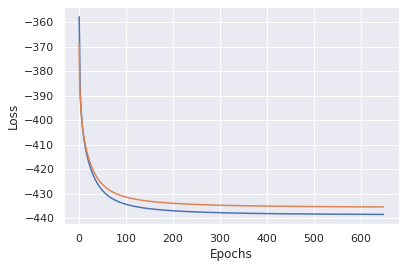

In [145]:
Weights = training(X_train,Y_train,4*1e-3,650,0,0)   # No regularisation

In [146]:
preds=np.exp(X_test @ Weights)
print(rmse(preds,Y_test))             # Finding RMSEs for the X_test predictions
print(Weights)

108.85087253412328
[ 0.68784245  1.38266734 -0.35695257 -0.08476991 -0.19786185 -0.56438192
 -0.79232227 -1.09345388 -1.24943206 -0.88987743  0.23611742  1.18311518
  1.70696678  1.16443818  0.86238406  1.00919536  1.18463022  1.18063346
  1.07205015  1.08119841  1.33043606  1.7583685   1.70828527  1.41278671
  1.12646845  0.87593474  0.63718411  0.25764397  0.32708069  0.35232006
  0.37589683  0.37846342  0.4027447   0.38284421  0.28990876  0.21129699
  0.47363653  0.37773513  0.65926512  0.79798007  0.7806458   0.33978627
  0.19444722  0.88654351  0.83879302  0.67092947  0.63594934]


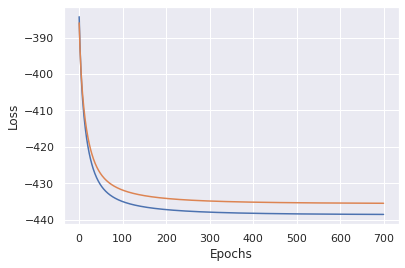

In [147]:
Weights = training(X_train,Y_train,4.5*1e-3,700,2,1)    # L1 norm

In [148]:
preds=np.exp(X_test @ Weights)
print(rmse(preds,Y_test))             # Finding RMSEs for the X_test predictions
print(Weights)

108.8818986872334
[ 0.78619464  1.3664465  -0.35806501 -0.14182598 -0.24751492 -0.6367095
 -0.94948352 -1.24228982 -1.41947028 -1.01682034  0.25107017  1.18913828
  1.71194224  1.17262197  0.87320802  1.01954409  1.19479186  1.19145401
  1.08448875  1.09363911  1.34171196  1.76784534  1.71693492  1.42175406
  1.13535932  0.88498072  0.64882389  0.2708084   0.41531258  0.44181416
  0.46421704  0.46784606  0.49095184  0.63079272  0.53811335  0.45831766
  0.72414715  0.62836395  0.90505212  0.67936259  0.66220293  0.22374811
  0.28264141  0.78111929  0.90087629  0.31566392  0.44048725]


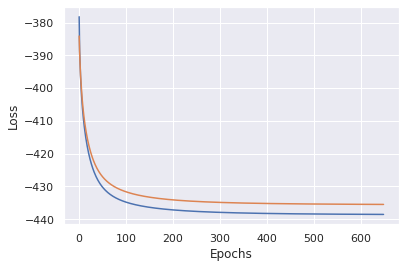

In [149]:
Weights = training(X_train,Y_train,4.5*1e-3,650,0.5,2)    # L2 norm

In [150]:
preds=np.exp(X_test @ Weights)
print(rmse(preds,Y_test))             # Finding RMSEs for the X_test predictions
print(Weights)

108.82694485489738
[ 0.92890549  1.36629888 -0.35126848 -0.1079772  -0.18303664 -0.60492391
 -0.80898123 -1.16016037 -1.33719691 -0.89608858  0.26657678  1.21650997
  1.74090898  1.19947573  0.89826019  1.04583539  1.22192598  1.21854826
  1.1106366   1.11988456  1.36890646  1.79620946  1.745449    1.44948748
  1.16238687  0.91074364  0.67189505  0.28883034  0.26282803  0.28851834
  0.31170369  0.31483638  0.33848842  0.55114823  0.45805181  0.45603066
  0.7226901   0.62793312  0.90443478  0.72966225  0.71152412  0.26965637
  0.19799115  0.58839871  0.7762044   0.3571232   0.55484766]
